# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

In [65]:
data = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
data

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [66]:
data.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [67]:
data.corr

<bound method DataFrame.corr of        Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0               0  2015-01-01   8682    F             False             True   
1               1  2015-01-01  12830    M              True             True   
2               2  2015-01-01   2885    M              True             True   
3               3  2015-01-01  16168    F              True            False   
4               4  2015-01-01  12438    M             False            False   
...           ...         ...    ...  ...               ...              ...   
14995       14995  2016-03-01   3678    M              True             True   
14996       14996  2016-03-01   3405    M              True             True   
14997       14997  2016-03-01   7944    F              True             True   
14998       14998  2016-03-01  16019    F             False             True   
14999       14999  2016-03-01  12895    F              True             True   

       

In [68]:
data.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

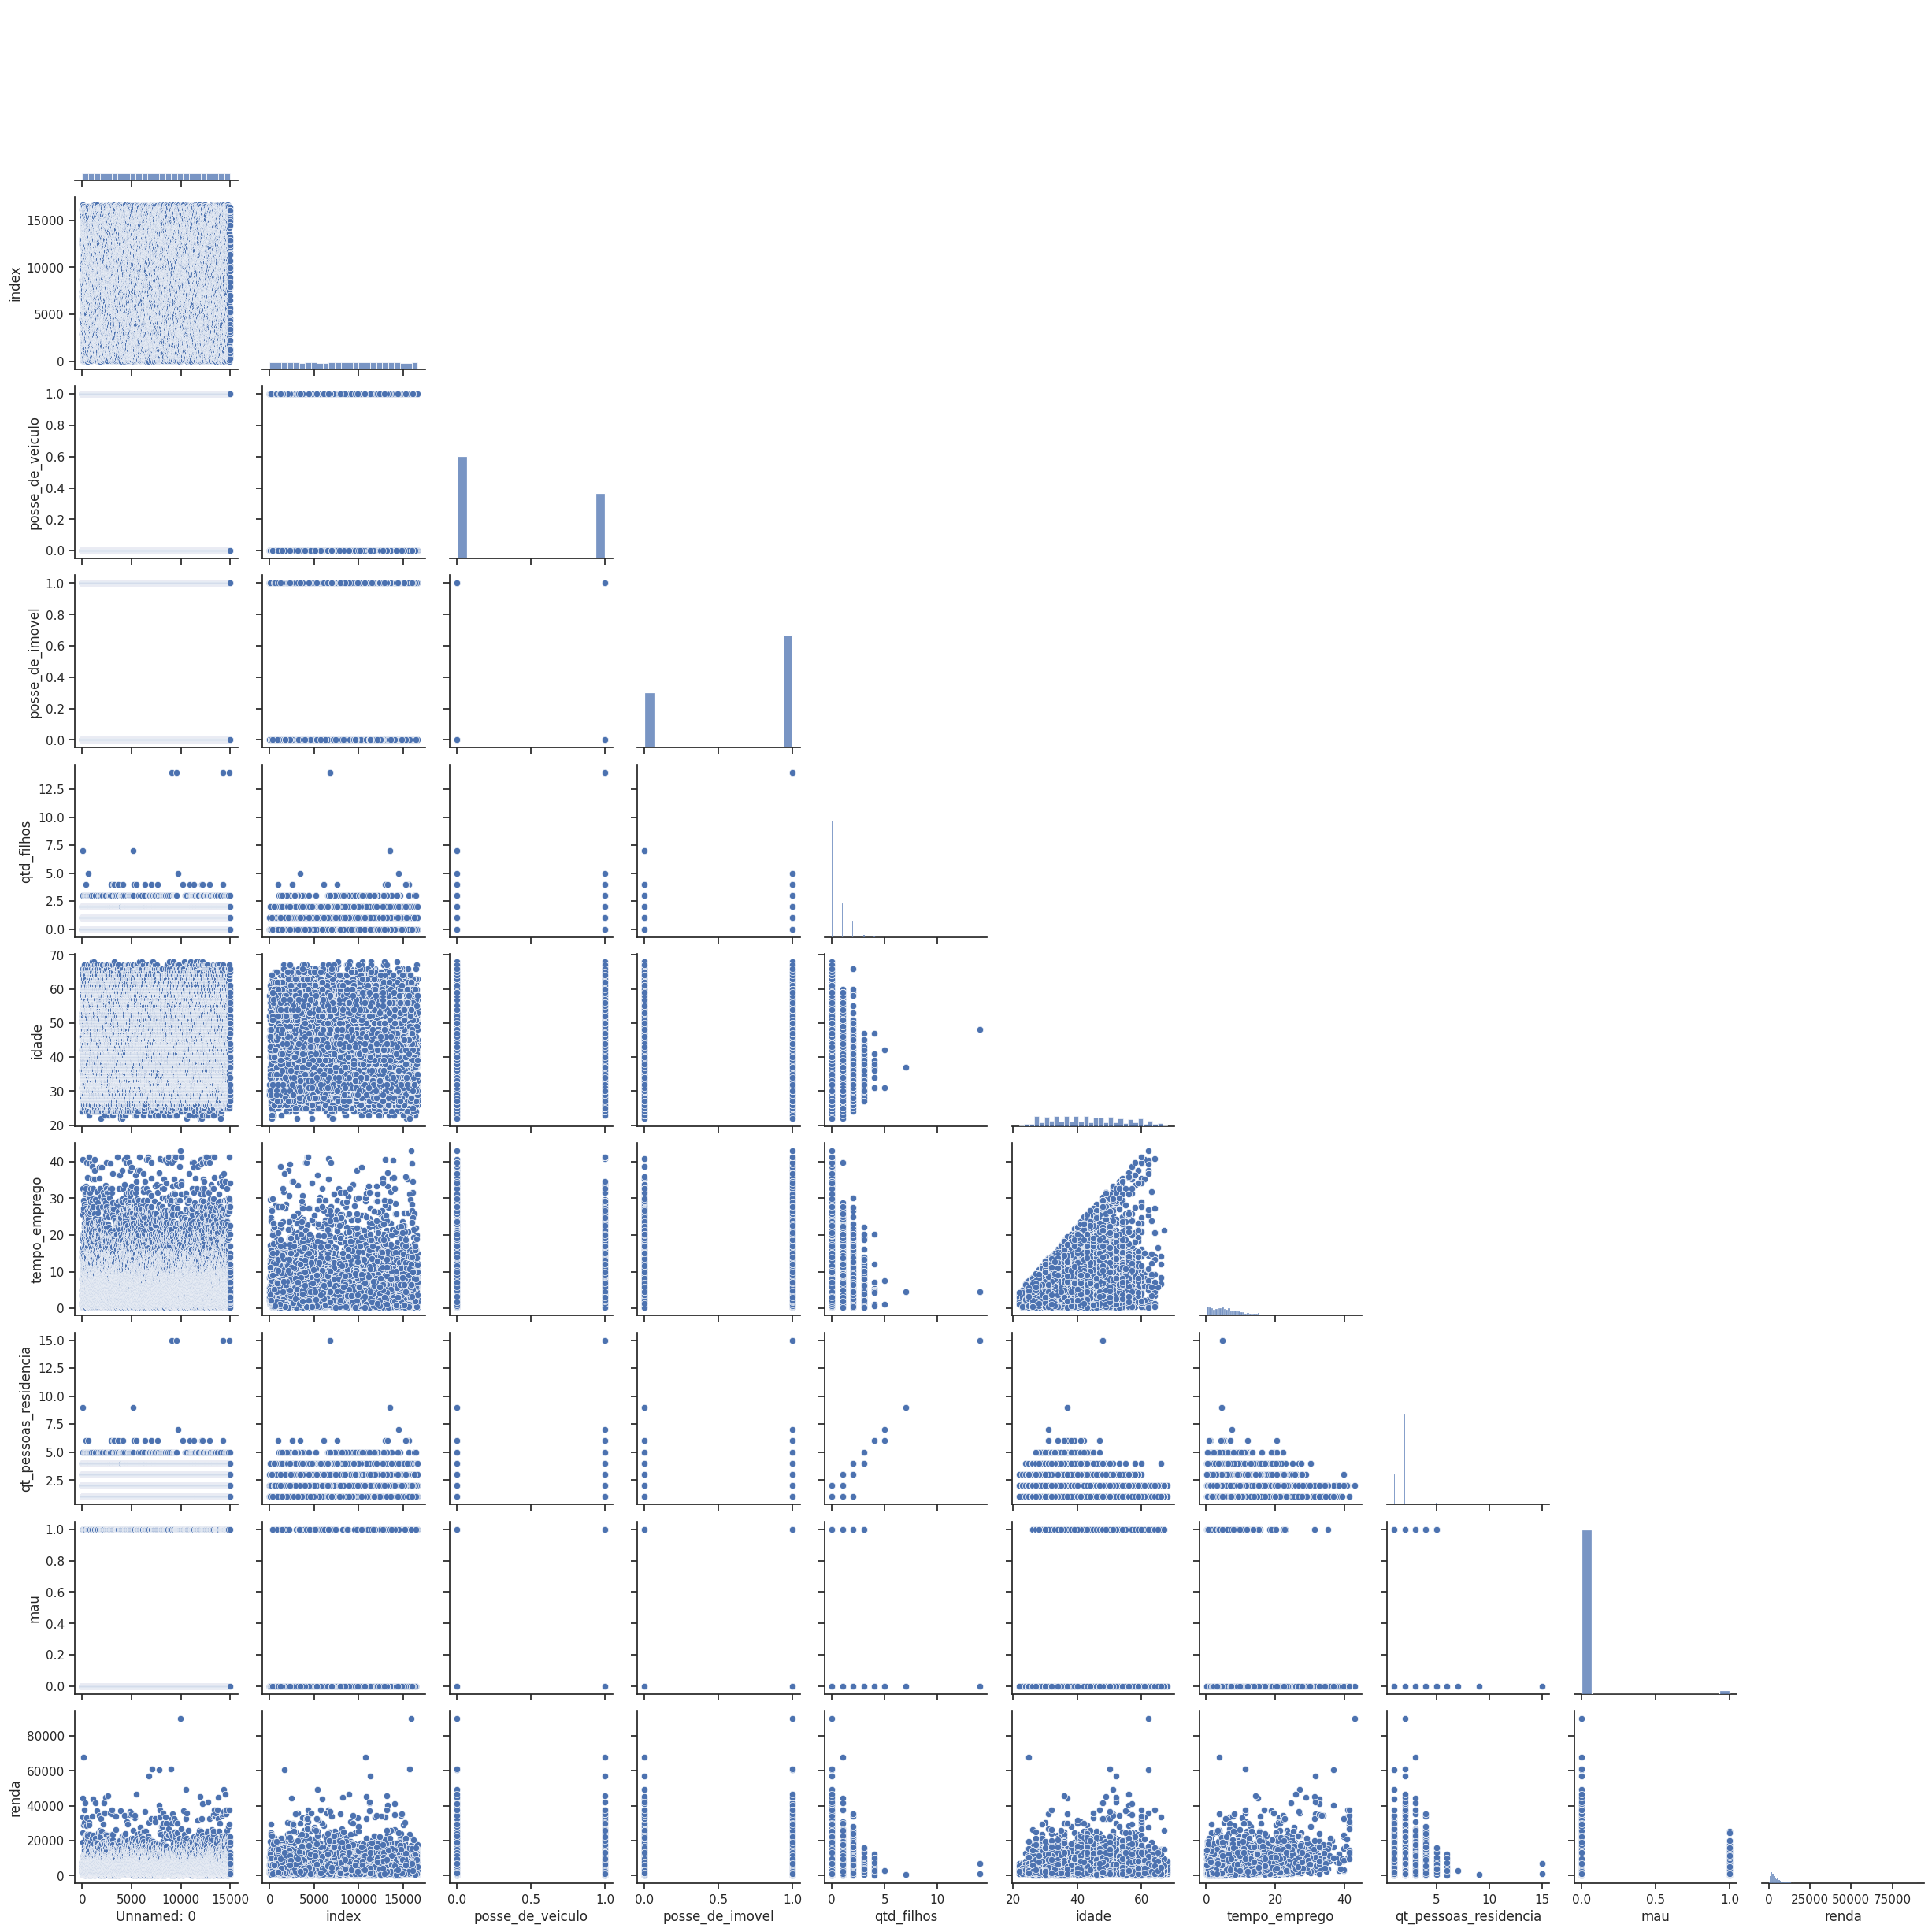

In [69]:
# Supondo que seus dados estão em um DataFrame chamado 'df' com variáveis quantitativas
sns.pairplot(data, diag_kind='hist', corner=True)  # corner=True mostra apenas a parte inferior

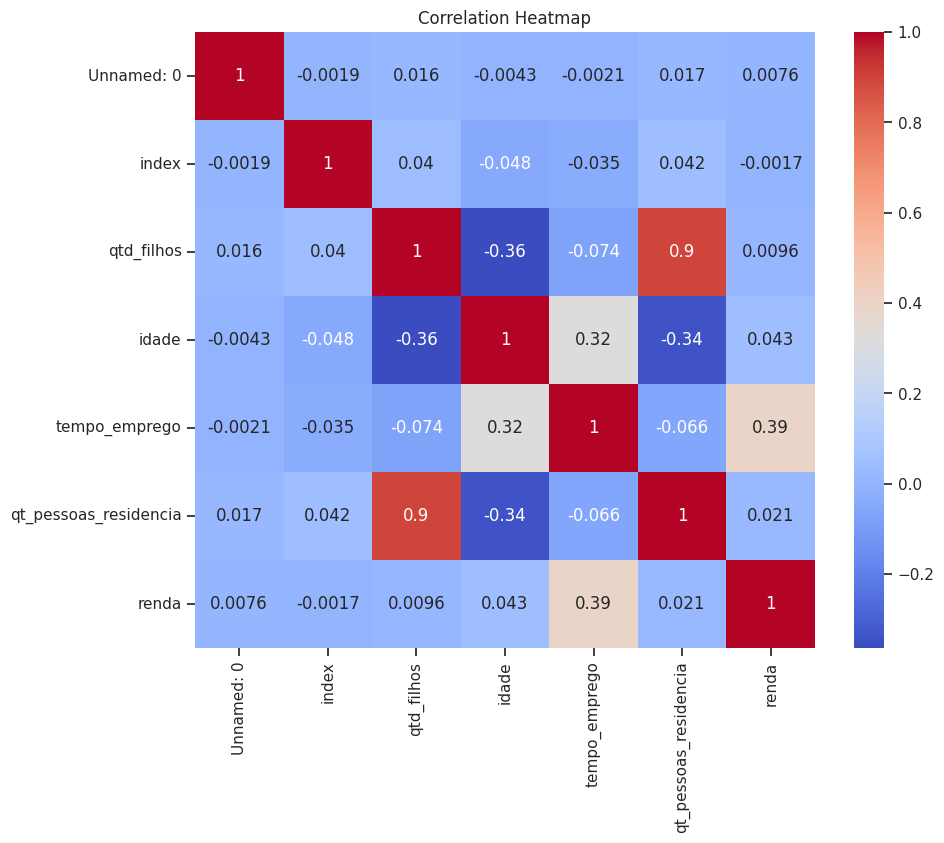

In [72]:
# Assuming 'data' is your DataFrame
# Step 1: Select only numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 3: Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [78]:
numeric_data = data.select_dtypes(include="number")

In [79]:
# calculando a correlacao com a variavel 'renda'
correlation_with_renda = numeric_data.corr()['renda'].sort_values(ascending=False)

In [81]:
# exibimos as duas variaveis mais correlacionadas (escluindo a propria 'renda')
top_two_variables = correlation_with_renda.index[1:3] # indince 0 e 'renda' (corr = 1)

In [83]:
#Exibir as duas variavels mais correlacionadas
print("as duas variaveis mais correlacionadas com renda sao: ")
print(top_two_variables)

as duas variaveis mais correlacionadas com renda sao: 
Index(['tempo_emprego', 'idade'], dtype='object')


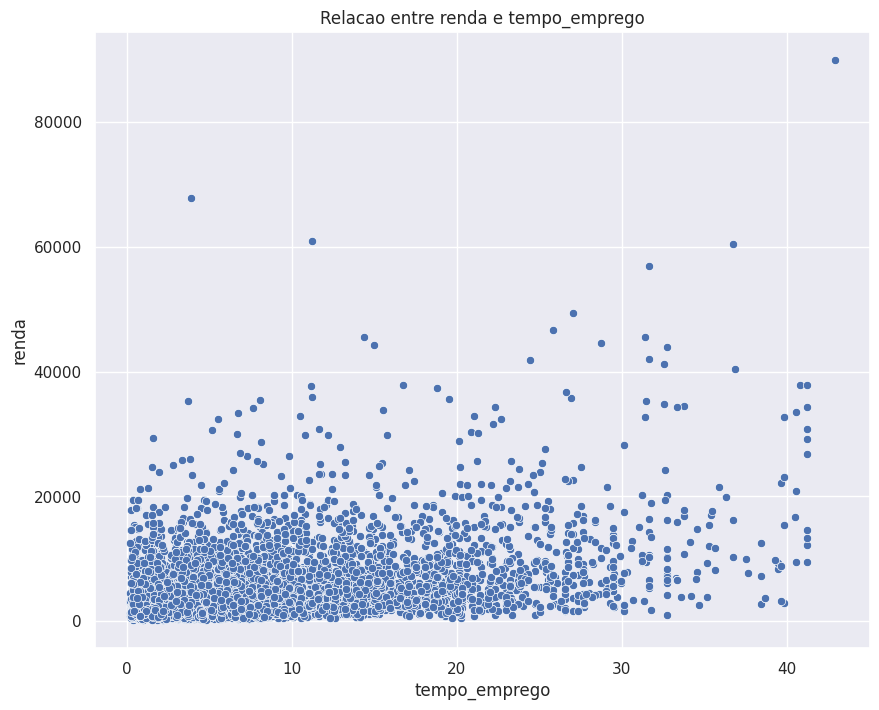

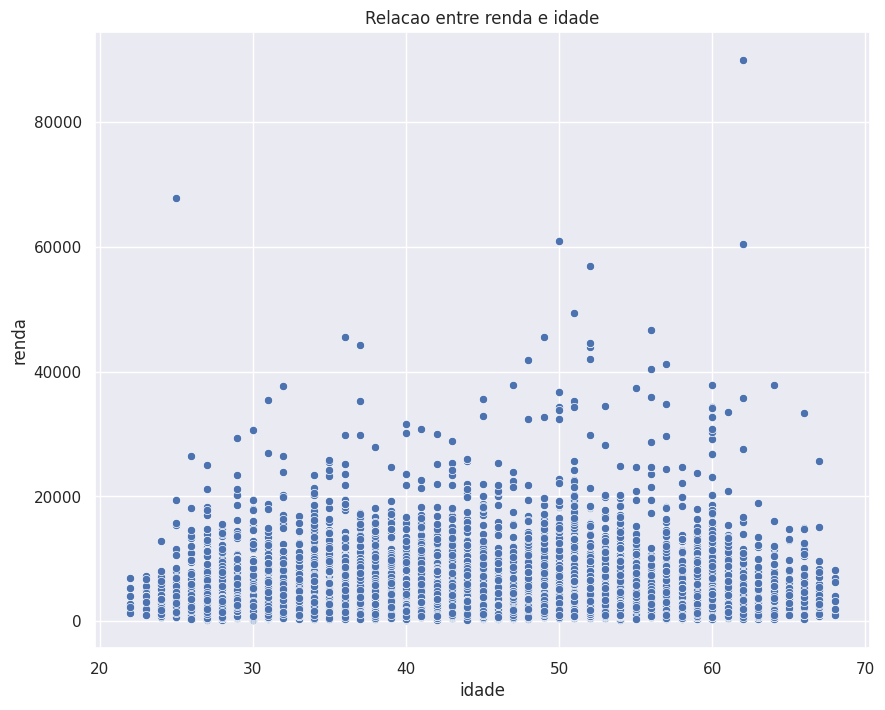

In [85]:
# criar graficos de dispersao para visualizacao
for var in top_two_variables:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[var], y=data['renda'])
    plt.title(f'Relacao entre renda e {var}')
    plt.xlabel(var)
    plt.ylabel('renda')
    plt.show(           )

3) Na su aopinião, há outliers na variável renda?

sim pela minha analise tem um valor que esta muito acima da variavel renda
que esse valor esta acima dos 80000

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [86]:
#selecionando apenas as colunas numericas para calcular as correlacoes
numeric_data_with_log = data.select_dtypes(include="number")

In [87]:
# calculando a matriz de correlacao
correlation_matrix_log = numeric_data_with_log.corr()

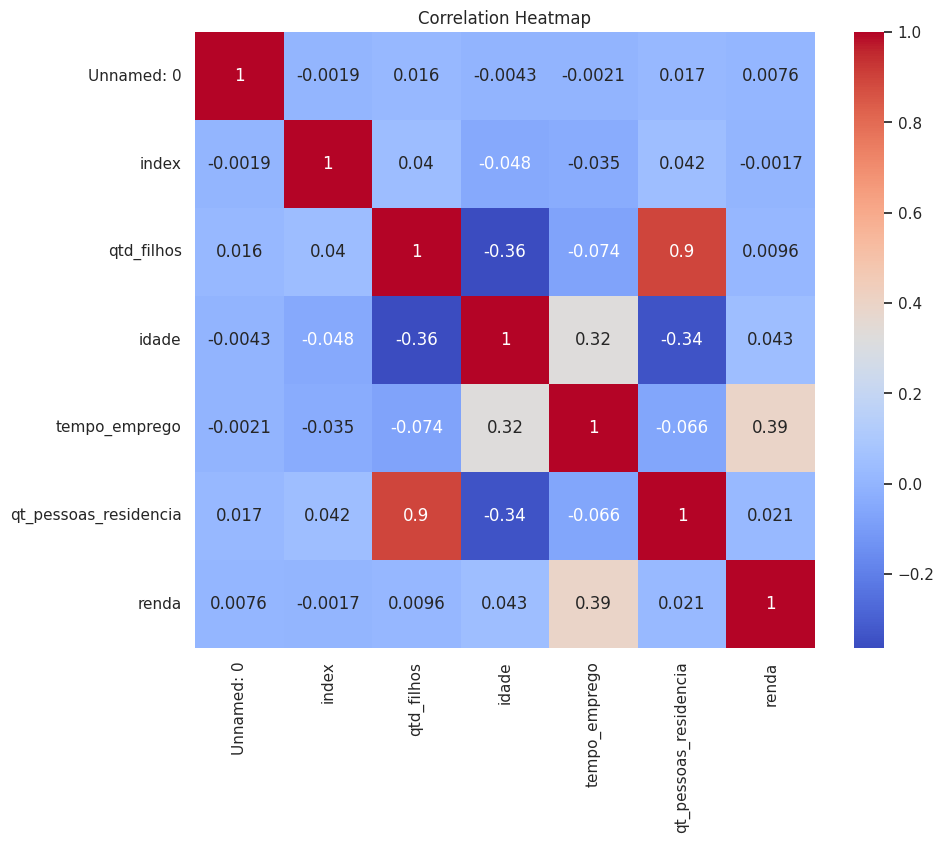

In [88]:
# criando um heatmap para visualizacao
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Adequacao para modelagem:
Modelos preditivos frequentemente fucionam melhor com variaveis normalisada.
Por isso, usar log no preprocessing pode levar a uma melhoria na criacao de modelos de regressao ou aprendizado de maquina